# Cálculo diferencial con Sympy

Sympy es una biblioteca de Python para matemáticas simbólicas. Permite realizar cálculos simbólicos, cálculo diferencial, cálculo integral, álgebra, ecuaciones diferenciales, etc. En este notebook vamos a ver cómo realizar cálculo diferencial con Sympy.



Primero importamos la biblioteca y definimos las variables simbólicas que vamos a utilizar:

In [1]:
from sympy import symbols

x, y, z = symbols('x y z')

Por ejemplo, podemos utilizar Sympy para simplificar expresiones, derivar funciones, integrar funciones, resolver ecuaciones diferenciales, etc.

In [2]:
from sympy import simplify

expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
simplified_expr = simplify(expr)
print(simplified_expr)  # x - 1

x - 1


Después creamos una expresión simbólica y la derivamos con respecto a una variable simbólica:

In [3]:
from sympy import diff

expr = x**2 + 2*x + 1
derivada = diff(expr, x)
print(derivada)  

2*x + 2


Podemos también calcular derivadas de orden superior:

In [4]:
segunda_derivada = diff(expr, x, 2)
print(segunda_derivada)  # 2

2


Si variamos la variable con respecto a la que derivamos, obtenemos la derivada parcial:

In [5]:
f = x**2 + y**2
df_dx = diff(f, x)  # 2*x
df_dy = diff(f, y)  # 2*y

Finalmente, podemos sustituir valores con el método `subs`:

In [6]:
derivada = 2*x + 2
valor_en_3 = derivada.subs(x, 3)
print(valor_en_3)  # 8

8


## Ecuaciones

Sympy también permite resolver ecuaciones. Por ejemplo, podemos resolver la ecuación $ x^2 -5x + 6 = 0 $:

In [7]:
from sympy import Eq, symbols

x = symbols('x')
ecuacion = Eq(x**2 - 5*x + 6, 0)

In [8]:
from sympy import solve

solucion = solve(ecuacion, x)
print(solucion)  # [2, 3]

[2, 3]


Este tipo de ecuaciones nos son lineales, por lo que no se pueden resolver con los métodos del álgebra lineal. Si bien en este caso la solución es trivial, Sympy también puede resolver ecuaciones más complicadas. El método `solve` devuelve una lista con las soluciones de la ecuación.

In [9]:
from sympy import sin

x = symbols('x')
expr = sin(x)

ecuacion_trascendental = Eq(expr, 1/2)
solucion_trascendental = solve(ecuacion_trascendental, x)
print(solucion_trascendental)

[0.523598775598299, 2.61799387799149]


In [10]:
x1, x2 = solucion_trascendental
expr.subs(x, x1)

0.500000000000000

In [11]:
expr.subs(x,x2)

0.500000000000000

El método `solve` también puede utilizarse para resolver sistemas de ecuaciones lineales. 

In [12]:
x, y = symbols('x, y')
sistema = [
    Eq(x + y, 5),
    Eq(x - y, 1)
]

solucion_sistema = solve(sistema, (x, y))
print(solucion_sistema)  # {x: 3, y: 2}

{x: 3, y: 2}


Sin embargo, no siempre es posible encontrar una solución simbólica:

In [13]:
try:
    ecuacion_no_lineal = Eq(x**2 + sin(x), 0)
    solucion_no_lineal = solve(ecuacion_no_lineal, x)
    print(solucion_no_lineal)
except:
    print("No se puede resolver")

No se puede resolver


En estos casos, es posible utilizar métodos numéricos para encontrar una solución aproximada. Intentaremos encontrar una aproximación a la ecuación anterior, utilizando `scipy.optimize.fsolve`:	

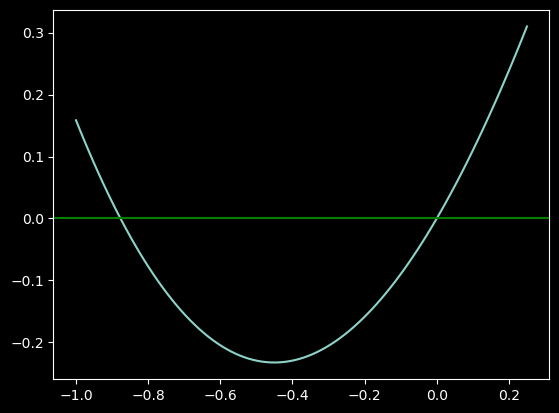

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 0.25, 100)
y = np.power(x,2) + np.sin(x)

plt.plot(x, y)
plt.axhline(0, color='green')  # This line adds the x-axis
plt.show()

In [15]:
from scipy.optimize import fsolve

def f(x):
    return np.power(x,2) + np.sin(x)

x = fsolve(f, [-1, 0.25])
x

array([-8.76726215e-01, -1.55708231e-13])

In [16]:
np.isclose(f(x), 0)

array([ True,  True])

## Puntos críticos

Los puntos críticos de una función diferenciable son aquellos en los que la derivada de la función es cero. Para encontrar los puntos críticos de una función, primero calculamos la derivada de la función y luego resolvemos la ecuación $ f'(x) = 0 $. Estos puntos pueden ser máximos, mínimos o puntos de inflexión. Por esta razón es que son importantes en el análisis de funciones y en la optimización.

Emplearemos las técnicas anteriores, para calcular puntos críticos de una función. Por ejemplo, consideremos la función $ f(x) = x^3 - 3x^2 + 2*x $:	

In [17]:
from sympy import symbols

x = symbols('x')

In [18]:
f = x**3 - 3*x**2 + 2*x


In [19]:
from sympy import lambdify
lam_f = lambdify(x, f, 'numpy')

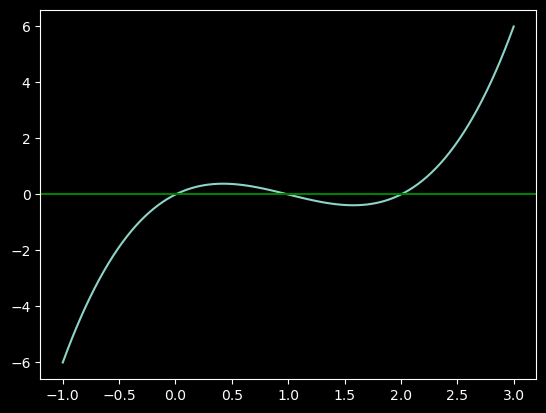

In [20]:
x_vals = np.linspace(-1, 3, 100)
y_vals = lam_f(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, color='green')
plt.show()

In [21]:
from sympy import diff

f_prime = diff(f, x)
f_prime

3*x**2 - 6*x + 2

In [22]:
from sympy import solve

critical_points = solve(f_prime, x)
critical_points

[1 - sqrt(3)/3, sqrt(3)/3 + 1]

In [23]:
lam_fp = lambdify(x, f_prime, 'numpy')

In [24]:
x1, x2 = critical_points

In [25]:
lam_fp(x1)

-4 + 3*(1 - sqrt(3)/3)**2 + 2*sqrt(3)

In [26]:
simplify(lam_fp(x1))

0

In [27]:
lam_fp(x1).evalf()

0.e-126

In [28]:
np.isclose(float(lam_fp(x1).evalf()), 0)

True

In [29]:
np.isclose(float(lam_fp(x2).evalf()), 0)

True

## Máximos y mínimos

Para determinar si un punto crítico es un máximo o un mínimo, podemos utilizar la segunda derivada. Si la segunda derivada es positiva, el punto crítico es un mínimo. Si la segunda derivada es negativa, el punto crítico es un máximo. Si la segunda derivada es cero, el test no es concluyente y se requiere de otro método para determinar si el punto crítico es un máximo, un mínimo o un punto de inflexión.

In [30]:
f_double_prime = diff(f_prime, x)
f_double_prime

6*x - 6

In [31]:

for point in critical_points:
    if f_double_prime.subs(x, point) > 0:
        print(f"{point} es un mínimo local.")
    elif f_double_prime.subs(x, point) < 0:
        print(f"{point} es un máximo local.")
    else:
        print(f"{point} no es concluyente.")

1 - sqrt(3)/3 es un máximo local.
sqrt(3)/3 + 1 es un mínimo local.
